In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/fussgängerzahlen.csv")
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%dT%XZ")

df = df[["timestamp", "location_id", "weather_condition", "temperature", "adult_pedestrians_count", "child_pedestrians_count"]]
df["pedestrians_count"] = (df.adult_pedestrians_count + (1/3)*df.child_pedestrians_count).round(0).astype(int)
df.drop(columns=["adult_pedestrians_count","child_pedestrians_count"], inplace=True)

df = pd.get_dummies(df, columns=["weather_condition"], drop_first=True)
df.columns = df.columns.str.replace("weather_condition_", "")

df

,timestamp,location_id,temperature,pedestrians_count,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind
0,2021-09-28 22:00:00,329,13.51,148,False,True,False,False,False,False,False,False
1,2021-09-28 22:00:00,331,13.51,117,False,True,False,False,False,False,False,False
2,2021-09-28 22:00:00,330,13.51,196,False,True,False,False,False,False,False,False
3,2021-09-28 23:00:00,329,13.46,18,False,True,False,False,False,False,False,False
4,2021-09-28 23:00:00,331,13.46,7,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
55498,2023-11-08 17:00:00,331,6.00,2965,True,False,False,False,False,False,False,False
55499,2023-11-08 17:00:00,330,6.00,1550,True,False,False,False,False,False,False,False
55500,2023-11-08 18:00:00,329,4.90,786,True,False,False,False,False,False,False,False
55501,2023-11-08 18:00:00,331,4.90,647,True,False,False,False,False,False,False,False


In [22]:
df_features = df[["timestamp", "temperature", "clear-night", "cloudy", "fog", "partly-cloudy-day", "partly-cloudy-night", "rain", "snow", "wind"]]
df_features = df_features.groupby(by="timestamp").mean().reset_index()
df_features

,timestamp,temperature,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind
0,2021-09-28 22:00:00,13.51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-28 23:00:00,13.46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29 00:00:00,13.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2021-09-29 01:00:00,13.51,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2021-09-29 02:00:00,13.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18496,2023-11-08 14:00:00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18497,2023-11-08 15:00:00,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18498,2023-11-08 16:00:00,8.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18499,2023-11-08 17:00:00,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_wide = df.pivot(index="timestamp", columns=["location_id"], values="pedestrians_count").reset_index().rename_axis(None, axis=1)
df_wide = df_wide.rename(columns={"timestamp": "datetime", 329: "bhfs_south", 330: "bhfs_middle", 331: "bhfs_north"})
df_wide["bhfs_total"] = df_wide.bhfs_south + df_wide.bhfs_middle + df_wide.bhfs_north
df_wide

,datetime,bhfs_south,bhfs_middle,bhfs_north,bhfs_total
0,2021-09-28 22:00:00,148,196,117,461
1,2021-09-28 23:00:00,18,24,7,49
2,2021-09-29 00:00:00,10,17,4,31
3,2021-09-29 01:00:00,6,13,2,21
4,2021-09-29 02:00:00,22,16,5,43
...,...,...,...,...,...
18496,2023-11-08 14:00:00,3383,1984,2724,8091
18497,2023-11-08 15:00:00,3282,1874,2921,8077
18498,2023-11-08 16:00:00,3681,1864,3168,8713
18499,2023-11-08 17:00:00,3261,1550,2965,7776


In [88]:
df_new = pd.merge(df_wide, df_features, left_on="datetime", right_on="timestamp", how="left")
df_new.drop(columns=["timestamp"], inplace=True)
df_new

,datetime,bhfs_south,bhfs_middle,bhfs_north,bhfs_total,temperature,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind
0,2021-09-28 22:00:00,148,196,117,461,13.51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-28 23:00:00,18,24,7,49,13.46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29 00:00:00,10,17,4,31,13.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2021-09-29 01:00:00,6,13,2,21,13.51,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2021-09-29 02:00:00,22,16,5,43,13.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2023-11-08 14:00:00,3383,1984,2724,8091,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18497,2023-11-08 15:00:00,3282,1874,2921,8077,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18498,2023-11-08 16:00:00,3681,1864,3168,8713,8.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18499,2023-11-08 17:00:00,3261,1550,2965,7776,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_new_daily = df_new.groupby(df_new['datetime'].dt.date).agg({'bhfs_total': 'sum'}).reset_index()
df_new_daily = df_new_daily.sort_values(by="bhfs_total", ascending=False)
df_new_daily.head(10) # result after examining relationship between public holidays in ZH and max pedestrian counts: no correlation

,datetime,bhfs_total
319,2022-08-13,390828
648,2023-07-08,271282
683,2023-08-12,258776
647,2023-07-07,168798
459,2022-12-31,163022
60,2021-11-27,154721
81,2021-12-18,153606
74,2021-12-11,152376
760,2023-10-28,149754
228,2022-05-14,146906


In [95]:
df2_1 = pd.read_csv("data/verkehrszahlen2021.csv")
df2_1.MessungDatZeit = pd.to_datetime(df2_1.MessungDatZeit, format="%Y-%m-%dT%X")
df2_1 = df2_1[["MessungDatZeit", "AnzFahrzeuge"]]
df2_1 = df2_1.groupby(by="MessungDatZeit").sum().reset_index() 

/tmp/ipykernel_898/3485221439.py:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2_1 = pd.read_csv("data/verkehrszahlen2021.csv")


In [96]:
df2_2 = pd.read_csv("data/verkehrszahlen2022.csv")
df2_2.MessungDatZeit = pd.to_datetime(df2_2.MessungDatZeit, format="%Y-%m-%dT%X")
df2_2 = df2_2[["MessungDatZeit", "AnzFahrzeuge"]]
df2_2 = df2_2.groupby(by="MessungDatZeit").sum().reset_index()  

/tmp/ipykernel_898/3132513321.py:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2_2 = pd.read_csv("data/verkehrszahlen2022.csv")


In [97]:
df2_3 = pd.read_csv("data/verkehrszahlen2023.csv")
df2_3.MessungDatZeit = pd.to_datetime(df2_3.MessungDatZeit, format="%Y-%m-%dT%X")
df2_3 = df2_3[["MessungDatZeit", "AnzFahrzeuge"]]
df2_3 = df2_3.groupby(by="MessungDatZeit").sum().reset_index()

/tmp/ipykernel_898/256028027.py:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2_3 = pd.read_csv("data/verkehrszahlen2023.csv")


In [107]:
df2 = pd.merge(df2_1, df2_2, on="MessungDatZeit", how="outer")
df2 = pd.merge(df2, df2_3, on="MessungDatZeit", how="outer")
df2['AnzFahrzeuge'] = df2['AnzFahrzeuge'].fillna(0) + df2['AnzFahrzeuge_x'].fillna(0) + df2['AnzFahrzeuge_y'].fillna(0)
df2.drop(columns=["AnzFahrzeuge_x", "AnzFahrzeuge_y"], inplace=True)
df2.isna().sum() # no missing values :)

MessungDatZeit    0
AnzFahrzeuge      0
dtype: int64

In [102]:
df_new_traffic = pd.merge(df_new, df2, left_on="datetime", right_on="MessungDatZeit", how="left").copy()
df_new_traffic.drop(columns=["MessungDatZeit"], inplace=True)
df_new_traffic = df_new_traffic.rename(columns={"AnzFahrzeuge": "traffic_vol"})
df_new_traffic

,datetime,bhfs_south,bhfs_middle,bhfs_north,bhfs_total,temperature,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind,traffic_vol
0,2021-09-28 22:00:00,148,196,117,461,13.51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41457.0
1,2021-09-28 23:00:00,18,24,7,49,13.46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23768.0
2,2021-09-29 00:00:00,10,17,4,31,13.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14125.0
3,2021-09-29 01:00:00,6,13,2,21,13.51,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7733.0
4,2021-09-29 02:00:00,22,16,5,43,13.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2023-11-08 14:00:00,3383,1984,2724,8091,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88415.0
18497,2023-11-08 15:00:00,3282,1874,2921,8077,11.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91036.0
18498,2023-11-08 16:00:00,3681,1864,3168,8713,8.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102345.0
18499,2023-11-08 17:00:00,3261,1550,2965,7776,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107239.0


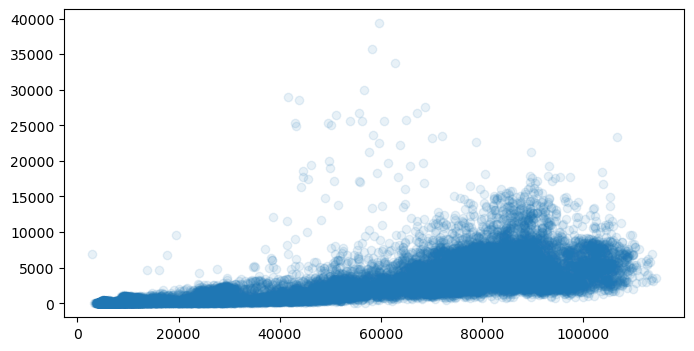

In [103]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_new_traffic.traffic_vol, df_new_traffic.bhfs_total, alpha=0.1);